<a href="https://colab.research.google.com/github/Benura2020/AdvancedMathematics/blob/main/mathsCW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Benura Wickramanayake*** |
***20220461*** |
***2236757***

# **Question 1**

## a)

In [ ]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

x = sym.symbols('x')
n = sym.symbols('n', integer=True, positive=True)
N = sym.symbols('N', integer=True, positive=True)

# define equations
eq1 = x**2 - 1
eq1

x**2 - 1

In [ ]:
eq2 = x*sym.exp(-x/2)
eq2

x*exp(-x/2)

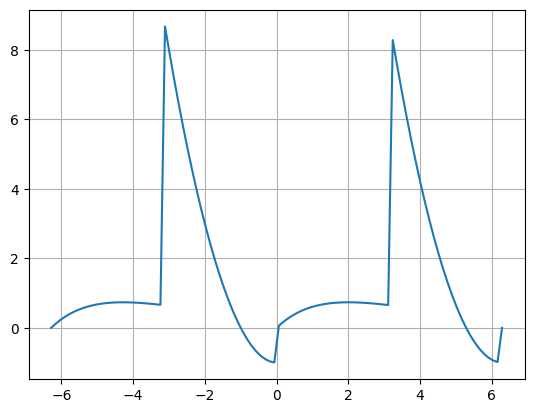

In [ ]:
x_values = np.linspace(2 * np.pi, -2 * np.pi, 100)
period = 2*np.pi

# Function

#       { x2 - 1     −𝜋 ≤ 𝑥 < 0
# f(x) =
#       { 𝑥∙𝑒−𝑥/2      0 ≤ 𝑥 ≤ 𝜋

def function(x, upper, down):
  f = 0
  if upper < x < 0:
    f = x**2 - 1
  elif 0 <= x <= down:
    f = x*sym.exp(-x/2)
  elif upper > x:
    x_new = x + period
    f = function(x_new, upper, down)
  elif down < x:
    x_new = x - period
    f = function(x_new, upper, down)
  return f


y_values = [function(i, -np.pi, np.pi) for i in x_values]

# plot the function
plt.plot(x_values, y_values)
plt.grid(True)
plt.show()

## b)

In [ ]:
a0 = (1/sym.pi)*((eq1.integrate((x, -sym.pi, 0))) + (eq2.integrate((x, 0, sym.pi))))
a0

(-pi + (-2*pi - 4)*exp(-pi/2) + 4 + pi**3/3)/pi

In [ ]:
an = (1/sym.pi)*(((eq1*sym.cos(n*x)).integrate((x, -sym.pi, 0))) + ((eq2*sym.cos(n*x)).integrate((x, 0, sym.pi))))
an

(-8*(-1)**n*pi*n**2/(16*n**4*exp(pi/2) + 8*n**2*exp(pi/2) + exp(pi/2)) + 16*(-1)**n*n**2/(16*n**4*exp(pi/2) + 8*n**2*exp(pi/2) + exp(pi/2)) - 2*(-1)**n*pi/(16*n**4*exp(pi/2) + 8*n**2*exp(pi/2) + exp(pi/2)) - 4*(-1)**n/(16*n**4*exp(pi/2) + 8*n**2*exp(pi/2) + exp(pi/2)) + 2*(-1)**n*pi/n**2 - 16*n**2/(16*n**4 + 8*n**2 + 1) + 4/(16*n**4 + 8*n**2 + 1))/pi

In [ ]:
bn = (1/sym.pi)*(((eq1*sym.sin(n*x)).integrate((x, -sym.pi, 0))) + ((eq2*sym.sin(n*x)).integrate((x, 0, sym.pi))))
bn

(-16*(-1)**n*pi*n**3/(16*n**4*exp(pi/2) + 8*n**2*exp(pi/2) + exp(pi/2)) - 16*(-1)**n*n/(16*n**4*exp(pi/2) + 8*n**2*exp(pi/2) + exp(pi/2)) - 4*(-1)**n*pi*n/(16*n**4*exp(pi/2) + 8*n**2*exp(pi/2) + exp(pi/2)) - (-1)**n/n + (-1)**n*pi**2/n - 2*(-1)**n/n**3 + 16*n/(16*n**4 + 8*n**2 + 1) + 1/n + 2/n**3)/pi

In [ ]:
f = a0/2 + sym.Sum(an*sym.cos((n*np.pi*x)/np.pi),(n, 1, np.inf)) + sym.Sum(bn*sym.sin((n*np.pi*x)/np.pi),(n, 1, np.inf))
f

Sum((-8*(-1)**n*pi*n**2/(16*n**4*exp(pi/2) + 8*n**2*exp(pi/2) + exp(pi/2)) + 16*(-1)**n*n**2/(16*n**4*exp(pi/2) + 8*n**2*exp(pi/2) + exp(pi/2)) - 2*(-1)**n*pi/(16*n**4*exp(pi/2) + 8*n**2*exp(pi/2) + exp(pi/2)) - 4*(-1)**n/(16*n**4*exp(pi/2) + 8*n**2*exp(pi/2) + exp(pi/2)) + 2*(-1)**n*pi/n**2 - 16*n**2/(16*n**4 + 8*n**2 + 1) + 4/(16*n**4 + 8*n**2 + 1))*cos(1.0*n*x)/pi, (n, 1, oo)) + Sum((-16*(-1)**n*pi*n**3/(16*n**4*exp(pi/2) + 8*n**2*exp(pi/2) + exp(pi/2)) - 16*(-1)**n*n/(16*n**4*exp(pi/2) + 8*n**2*exp(pi/2) + exp(pi/2)) - 4*(-1)**n*pi*n/(16*n**4*exp(pi/2) + 8*n**2*exp(pi/2) + exp(pi/2)) - (-1)**n/n + (-1)**n*pi**2/n - 2*(-1)**n/n**3 + 16*n/(16*n**4 + 8*n**2 + 1) + 1/n + 2/n**3)*sin(1.0*n*x)/pi, (n, 1, oo)) + (-pi + (-2*pi - 4)*exp(-pi/2) + 4 + pi**3/3)/(2*pi)

## c)

In [ ]:
ms = np.empty(150, dtype=object)
y = np.zeros([151, 100])

In [ ]:
ms[0] = a0/2

f = sym.lambdify(x, ms[0], 'numpy')
y[0, :] = f(x_values)

In [ ]:
for m in range(1, 150):
  ms[m] = ms[m-1] + an.subs(n, m) * sym.cos(m*x) + bn.subs(n, m) * sym.sin(m*x)
  f = sym.lambdify(x, ms[m], 'numpy')
  y[m, :] = f(x_values)

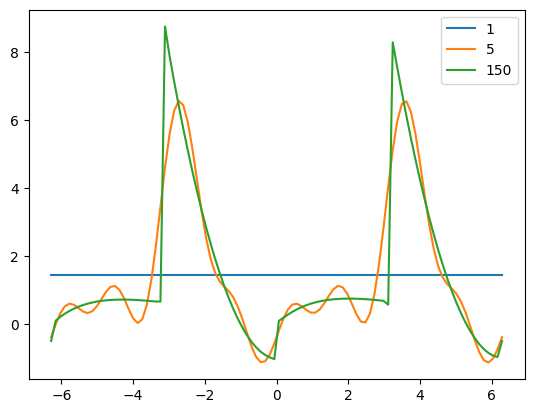

In [ ]:
# First harmonic
plt.plot(x_values, y[0, :])
# Up to 5th harmonic
plt.plot(x_values, y[4, :])
# Up to 150th harmonic
plt.plot(x_values, y[149, :])

#plt.plot(x_values, y_values)

plt.legend(["1", "5", "150"])
plt.show()

## d)

RMSE for 1st harmonic:  2.1169969261117774
RMSE for 5th harmonic:  1.8601013674416376
RMSE for 150th harmonic:  1.844820717461884


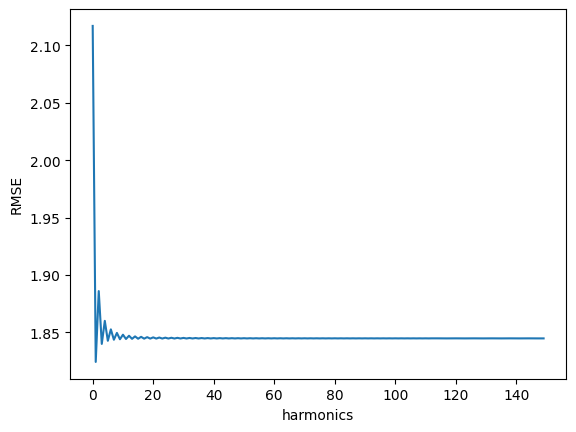

In [ ]:
def f(x):
    return np.where((x>= -np.pi)&(x<0),(x**2)+1,np.where((x>=0)&(x<np.pi),x*np.exp(-x),0))

def har(x,n):
    return np.sin(n*x)/n

def rmse(f,har,x):
    return np.sqrt(np.mean(np.square(f-har)))

xrange = np.linspace(-4*np.pi, 4*np.pi, 1000)

rmseVal = []
for n in range(1,151):
    rmseVal.append(rmse(f(xrange),har(xrange,n),xrange))

print("RMSE for 1st harmonic: ", rmseVal[0])
print("RMSE for 5th harmonic: ", rmseVal[4])
print("RMSE for 150th harmonic: ",rmseVal[149])

plt.plot(rmseVal)
plt.xlabel('harmonics')
plt.ylabel('RMSE')
plt.show()


# Question 2

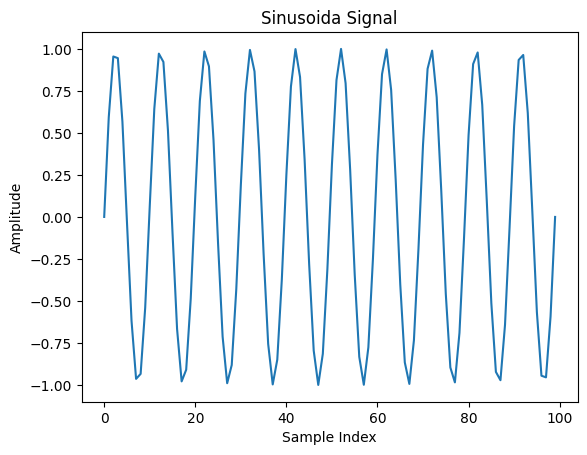

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function that generates a sinusodial signal with a given frequency, sample rate and duration

def genearate_sinusodial(frequency, sampling_rate, duration):
  t = np.linspace(0, duration, int(duration * sampling_rate))
  signal = np.sin(2 * np.pi * frequency * t)
  return signal

# Generate a sinusodial signal with a frequency of 10 HZ. Sampling rate is 100HZ and Duration is 1 second.

frequency = 10
sampling_rate = 100
duration = 1
signal = genearate_sinusodial(frequency, sampling_rate, duration)

plt.plot(signal)
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Sinusoida Signal')
plt.show()

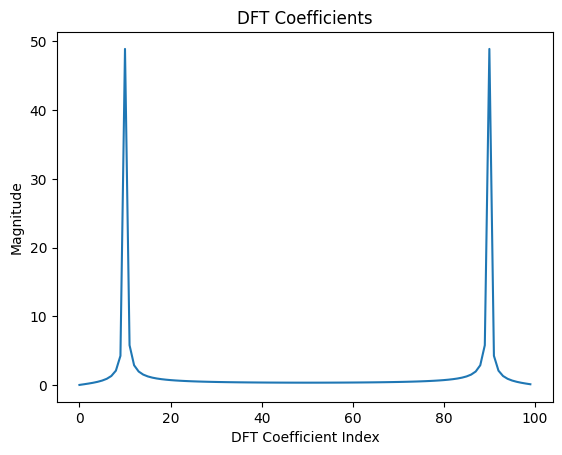

In [ ]:
# DFT of the signal
dft = np.fft.fft(signal)

# Plot magnitude of the DFT coefficient
plt.plot(np.abs(dft))
plt.xlabel('DFT Coefficient Index')
plt.ylabel('Magnitude')
plt.title('DFT Coefficients')
plt.show()

Explain

# Quention 3

## a)

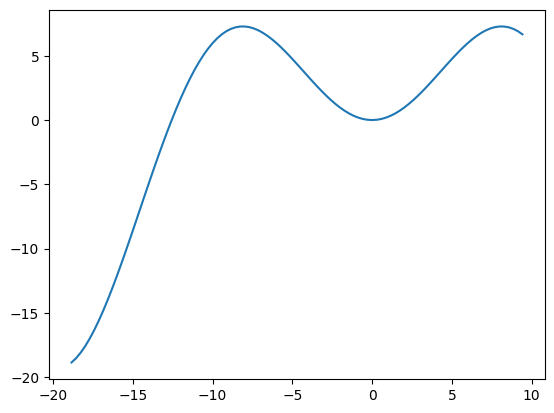

In [ ]:
import numpy as np
def f(x):
  return x * np.sin(x/4)

x = np.linspace(-6 * np.pi, 3 * np.pi, 100)
y = f(x)

plt.plot(x, y)
plt.show()

## b)


In [ ]:
import sympy as sym

# Define the symbolic variable x
x = sym.symbols('x')

# Define the function f(x)
f = sym.sin(x/4)

# Taylor series expansion around x = pi/4
taylor_series = sym.series(f, x, sym.pi/4, 50).removeO()

# Taylor series
print("Taylor series expansion for f(x) = sin(x/4) at x = pi/4:")
print(taylor_series)


Taylor series expansion for f(x) = sin(x/4) at x = pi/4:
(x - pi/4)**49*cos(pi/16)/192772217512746374967521714678763033558542685404626946796053158647716100293850562560000000000 + (x - pi/4)**48*sin(pi/16)/983531722003808035548580176932464456931340231656259932632924278814878062723727360000000000 - (x - pi/4)**47*cos(pi/16)/5122561052103166851815521754856585713184063706543020482463147285494156576686080000000000 - (x - pi/4)**46*sin(pi/16)/27247665170761525807529371036471200602042892056079896183314613220713598812160000000000 + (x - pi/4)**45*cos(pi/16)/148085136797616988084398755632995655445885282913477696648448984895182602240000000000 + (x - pi/4)**44*sin(pi/16)/822695204431205489357770864627753641366029349519320536935827693862125568000000000 - (x - pi/4)**43*cos(pi/16)/4674404570631849371350970821748600235034257667723412141680839169671168000000000 - (x - pi/4)**42*sin(pi/16)/27176770759487496345063783847375582761827079463508210126051390521344000000000 + (x - pi/4)**41*cos(pi/16)/1617664

## c)

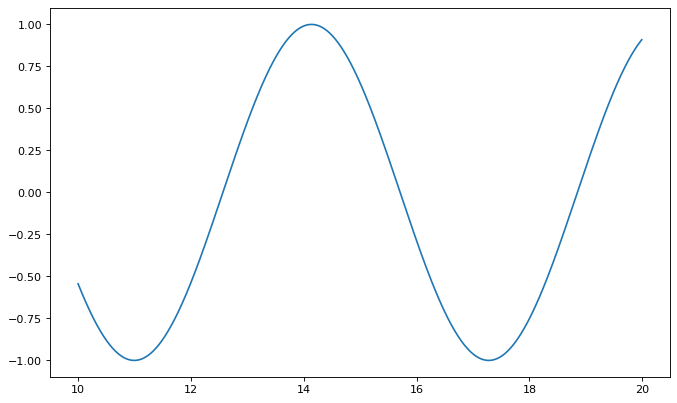

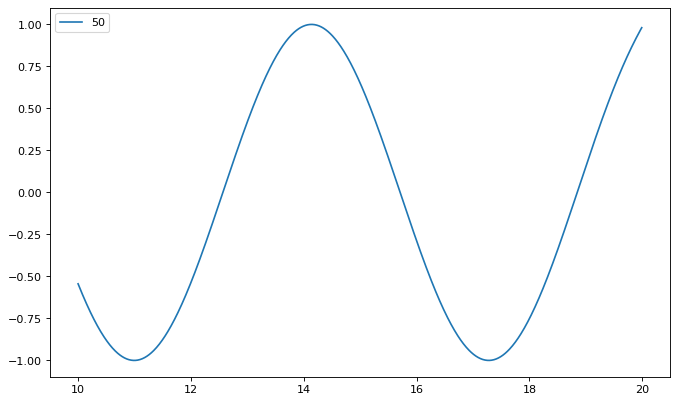

In [ ]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

x = sym.symbols('x')
x_values = np.arange(10, 20, 0.01)
eqn = sym.sin(x)
eqn_lamb = sym.lambdify(x, eqn)
y_values = eqn_lamb(x_values)
plt.figure(figsize = (10, 6), dpi=80)
plt.plot(x_values, y_values)
plt.show()

def taylor(function, initial, n):
  i = 0
  p = 0
  while i <= n:
    p = p + (function.diff(x,i).subs(x,initial))/(sym.factorial(i))*(x-initial)**i
    i += 1
  return p

tay_2 = taylor(eqn, sym.pi/4, 50)

tay_2_y = [tay_2.subs(x,v) for v in x_values]

plt.figure(figsize=(10,6), dpi=80)
plt.plot(x_values, tay_2_y)
plt.legend(["50"])
plt.show()

## d)


In [ ]:
# Evaluate the Taylor series at x = pi^4 / 2
approximation_taylor_series = taylor_series.subs(x, (sym.pi**4) / 2).evalf()

# Actual value of sin(pi^4 / 2)
actual_value = np.sin((np.pi**4) / 2)

# Calculate the absolute error
absolute_error_taylor_series = abs(actual_value - approximation_taylor_series)

print(f"Approximation using Taylor series: {approximation_taylor_series}")
print(f"Actual value: {actual_value}")
print(f"Absolute error: {absolute_error_taylor_series}")


Approximation using Taylor series: -0.380405050854673
Actual value: -0.9999513966440274
Absolute error: 0.619546345789354


# Question 4


## a)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


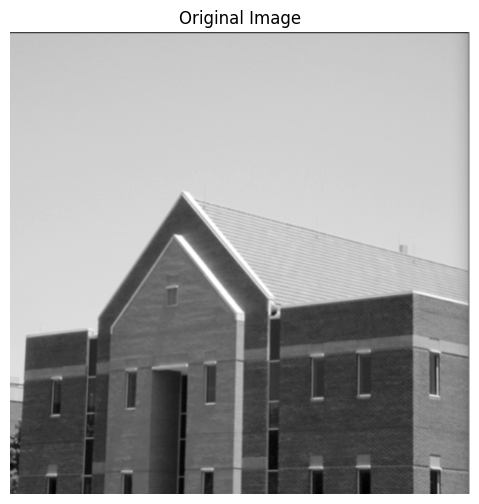

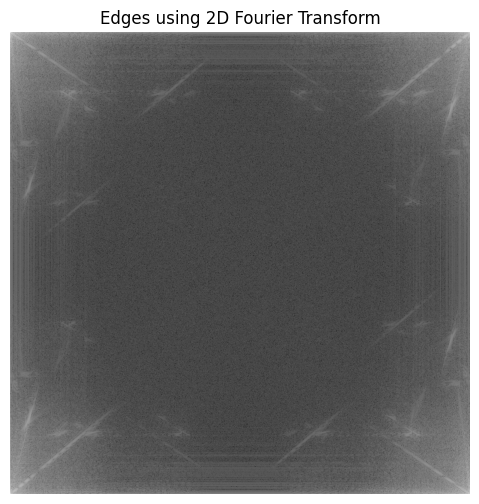

In [ ]:
import numpy as np
import cv2
from skimage import img_as_float
from scipy.fft import fft2, ifft2, dctn, idctn
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

image_path = '/content/drive/MyDrive/Maths CW Image/4th Q Image.png'

# get image
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(original_image, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Find edges using 2D Fourier transform
edges = np.abs(fft2(original_image))

# Display the edges
plt.figure(figsize=(6, 6))
plt.imshow(np.log1p(edges), cmap='gray')
plt.title('Edges using 2D Fourier Transform')
plt.axis('off')
plt.show()

## b)

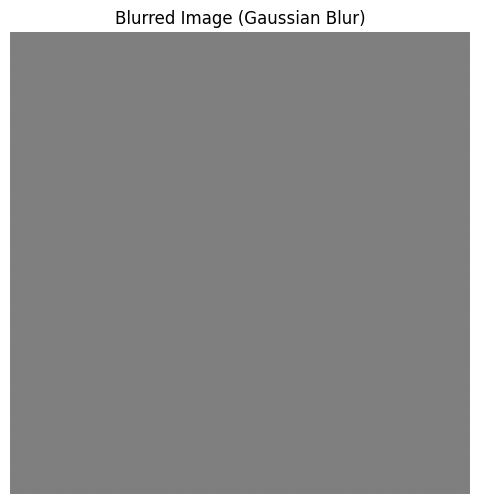

In [ ]:
# Apply Gaussian blur using 2D Fourier transform
def gaussian_blur(image, sigma):
    rows, cols = image.shape
    x = np.arange(0, cols, 1)
    y = np.arange(0, rows, 1)
    x, y = np.meshgrid(x, y)

    gaussian_filter = np.exp(-((x - cols // 2)**2 + (y - rows // 2)**2) / (2 * sigma**2))
    blurred_image = ifft2(fft2(image) * gaussian_filter).real

    return blurred_image

sigma = 10
blurred_image = gaussian_blur(original_image, sigma)

# Display the blurred image
plt.figure(figsize=(6, 6))
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image (Gaussian Blur)')
plt.axis('off')
plt.show()

## c)

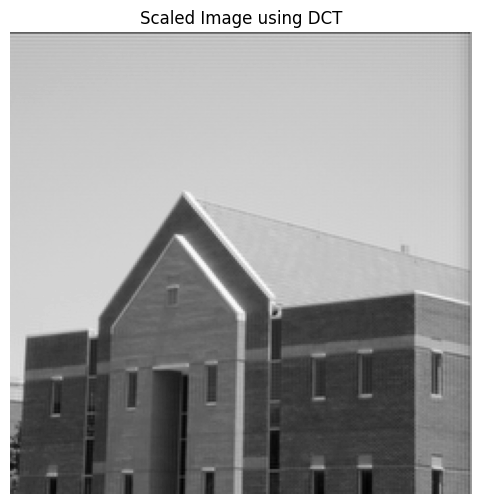

In [ ]:
# Apply DCT and scale image
def scale_dct(image, target_size):
    dct_coefficients = dctn(image, norm='ortho')
    resized_dct = np.zeros(target_size)

    min_size = min(target_size[0], dct_coefficients.shape[0])
    resized_dct[:min_size, :min_size] = dct_coefficients[:min_size, :min_size]

    resized_image = idctn(resized_dct, norm='ortho')

    return resized_image

target_size = (240, 240)
scaled_dct_image = scale_dct(original_image, target_size)

# Display the scaled DCT image
plt.figure(figsize=(6, 6))
plt.imshow(scaled_dct_image, cmap='gray')
plt.title('Scaled Image using DCT')
plt.axis('off')
plt.show()


## d)

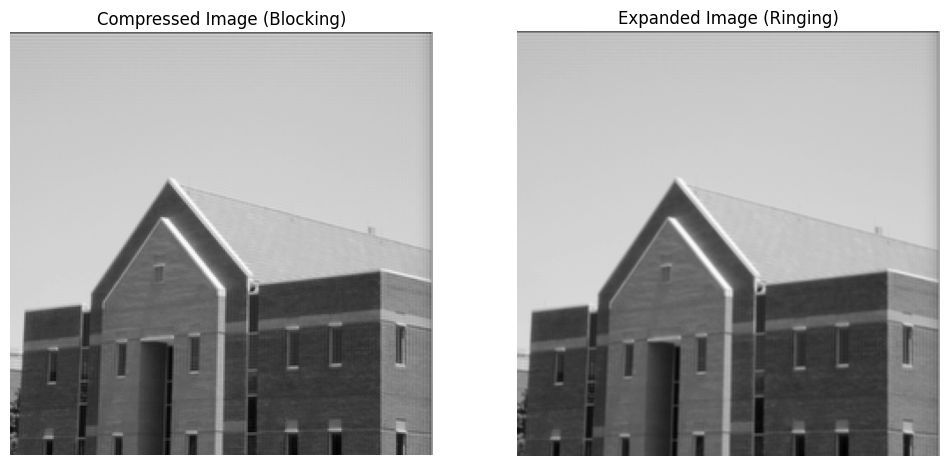

In [ ]:
# Reproduce compression artifacts (ringing and blocking)
compressed_image = img_as_float(scaled_dct_image)  # Convert to floating-point for display
expanded_image = cv2.resize(compressed_image, (original_image.shape[1], original_image.shape[0]))

# Display the reproduced artifacts
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(compressed_image, cmap='gray')
plt.title('Compressed Image (Blocking)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(expanded_image, cmap='gray')
plt.title('Expanded Image (Ringing)')
plt.axis('off')

plt.show()


# Question 5

## a)

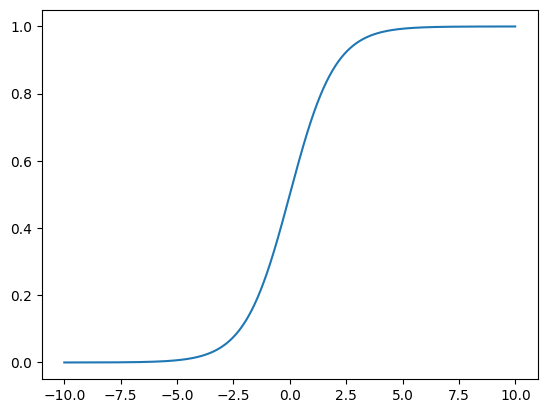

In [ ]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

x = sym.symbols('x')
eq = 1/(1+sym.exp(-x))
f = sym.lambdify(x, eq, 'numpy')
x1 = np.arange(-10,10,0.01)
y1 = f(x1)
plt.plot(x1, y1)

## b)

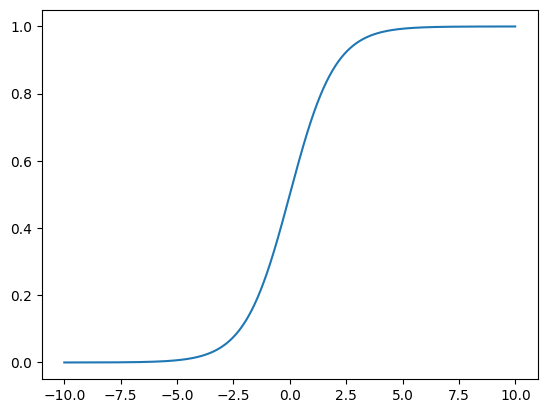

In [ ]:
eq1 = sym.diff(eq)
f1 = sym.lambdify(x, eq1, 'numpy')
x1 = np.arange(-10,+10,0.01)
y2 = f1(x1)
plt.plot(x1, y1)

## c)

### a.

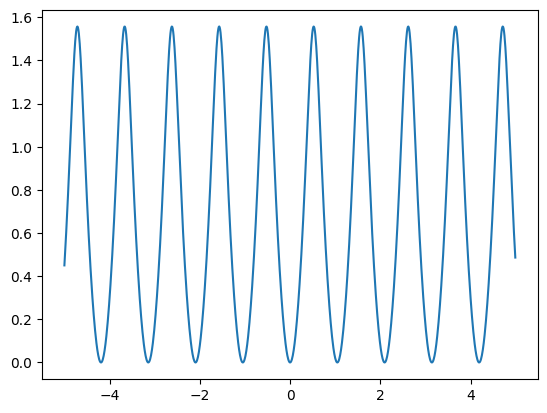

In [ ]:
x = sym.symbols('x')
eq2 = sym.tan((sym.sin(3*x))**2)
f2 = sym.lambdify(x, eq2, 'numpy')
x1 = np.arange(-5,5,0.01)
y1 = f2(x1)
plt.plot(x1, y1)

### b.

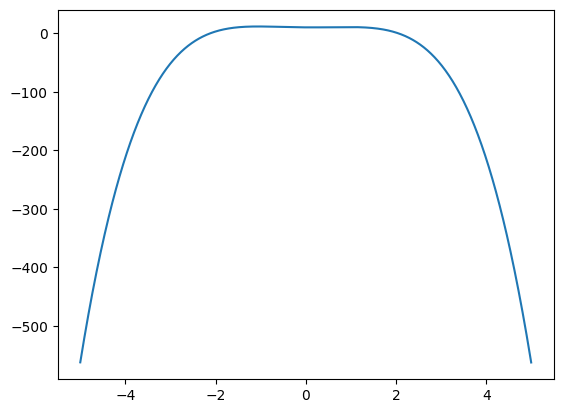

In [ ]:
x = sym.symbols('x')
eq3 = -x**4 + 2*x**2 - 0.5*x + 10
f3 = sym.lambdify(x, eq3, 'numpy')
x1 = np.arange(-5,5,0.01)
y1 = f3(x1)
plt.plot(x1, y1)

### c.

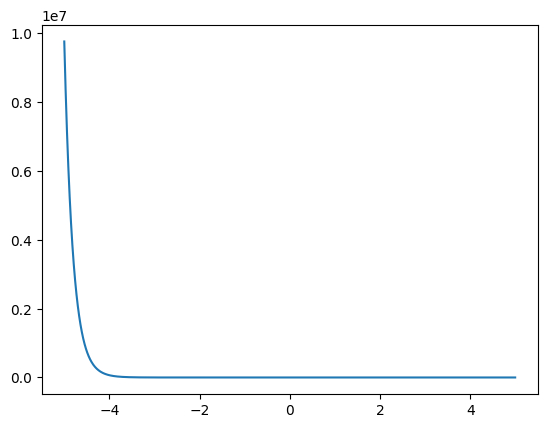

In [ ]:
x = sym.symbols('x')
eq4 = sym.exp(-x*sym.ln(x**2))
f4 = sym.lambdify(x, eq4, 'numpy')
x1 = np.arange(-5,5,0.01)
y1 = f4(x1)
plt.plot(x1, y1)

### d.

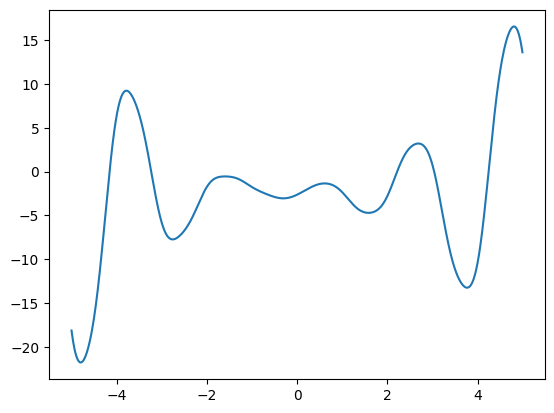

In [ ]:
x = sym.symbols('x')
eq5 = x**2 * sym.sin(sym.sin(3*x)) - 3 * sym.cos(sym.cos(2*x - sym.pi/3))
f5 = sym.lambdify(x, eq5, 'numpy')
x1 = np.arange(-5,5,0.01)
y1 = f5(x1)
plt.plot(x1, y1)

## d)

### a.

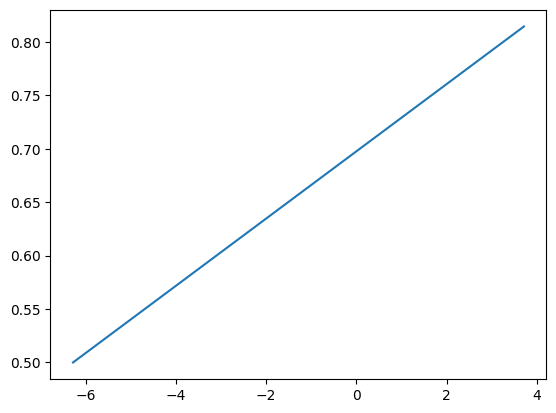

In [ ]:
# Define the logistic function
def logistic(x):
  return 1/ (1 + np.exp(-x))

# Array of x values from 0 to 2*pi
x = np.arange(-2*np.pi, 2*np.pi, 10)

# Apply logistic function
y = logistic(np.tan((np.sin(3*x))**2))

plt.plot(x, y)
plt.show()

### b.

<ipython-input-7-6536b44d7c5c>:3: RuntimeWarning: overflow encountered in exp
  return 1/ (1 + np.exp(-x))


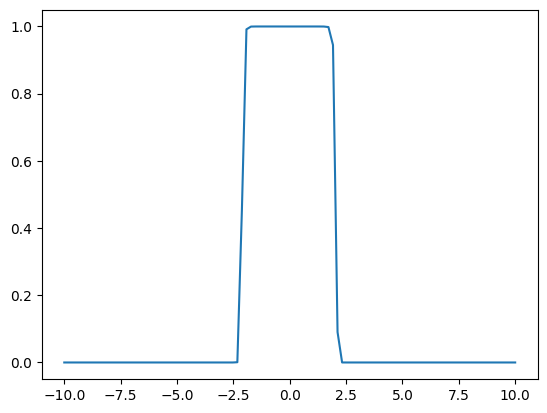

In [ ]:
x = np.linspace(-10, 10, 100)
y = logistic(-x**4 + 2*x**2 - 0.5*x + 10)

plt.plot(x,y)
plt.show()

### c.

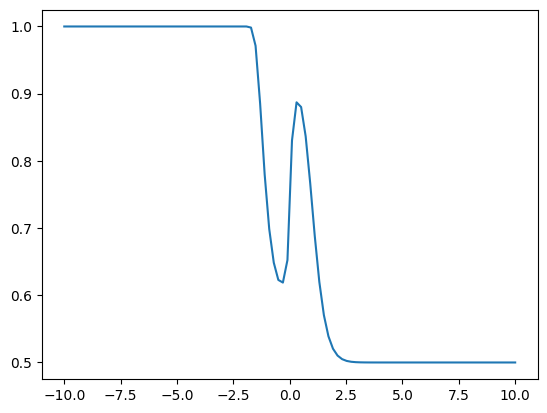

In [ ]:
ln = np.log
x = np.linspace(-10, 10, 100)
y = logistic(np.exp(-x*ln(x**2)))

plt.plot(x,y)
plt.show()